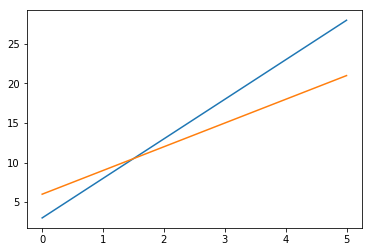

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import xpress as xp

# coefficients
c = [5, 3]
b = [3, 6]
nRange = range(len(c))

# Breakpoints
lower_bp = [0, 1.6]
upper_bp = [1.6, 5]

x = np.linspace(0,5)
y1 = lambda x : c[0]*x + b[0]
y2 = lambda x : c[1]*x + b[1]

plt.plot(x, y1(x))
plt.plot(x,y2(x))

In [30]:
def get_linear_value(x_fix):
    model = xp.problem("Test")
    x = {i : xp.var(vartype = xp.continuous, lb = 0, ub = 5, name = f'x_{i}') for i in nRange}
    l = {i : xp.var(vartype = xp.binary, name = f'lambda_{i}') for i in nRange}
    y = xp.var(vartype = xp.continuous, lb = 0, ub = 30, name = 'y')
    model.addVariable(x,y,l)
    
    equality_constraint = xp.constraint(y == xp.Sum(c[i]*x[i] + b[i]*l[i] for i in nRange), name = "Equality constraint")
    semi_continuous_lower = [xp.constraint(l[i]*lower_bp[i] <= x[i], name = f'Lower bound for x_{i}') for i in nRange]
    semi_continuous_upper = [xp.constraint(l[i]*upper_bp[i] >= x[i], name = f'Upper bound for x_{i}') for i in nRange]
    lambda_sum = xp.constraint(xp.Sum(l[i] for i in nRange) == 1, name = "Lambda sum to 1")
    model.addConstraint(equality_constraint, semi_continuous_lower, semi_continuous_upper, lambda_sum)
    
    # Fix value of x
    if x_fix <= lower_bp[1]:
        model.addConstraint(x[0] == x_fix)
    else:
        model.addConstraint(x[1] == x_fix)
        
    model.solve()
    
    return model.getSolution(y)      

In [26]:

x_i = {i :}
hydrogen_created[t] <= xp.sum(c_i * x_i + b_i for i in all_is) for t in times)



14.0

In [33]:
y2(3)

15

In [27]:
y1(1)

8

In [32]:
get_linear_value(3)

15.0